In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [4]:
df_test = pd.read_csv("test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
 # Concatenate the datasets while maintaining order
df = pd.concat([df_train, df_test], axis=0, ignore_index=True, sort=False)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN
783666,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN


## In df.tail() we are getting null values in the 'Purchase' column because we have merged this with the train dataset. 
## df_test has no column named as "Purchased".

In [7]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


## Observations:
### Here Age is object because it is given in range.
### Product_ID is object because it is combination of int + str.

In [9]:
df = df.drop(['User_ID','Product_ID'],axis=1)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
df.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

#### There are 5 categorical features. 
#### -Gender
#### -Age
#### -Product_ID
#### -City_Category
#### -Stay_In_Current_City_Years

# Handling categorical features

In [11]:
#Gender
df['Gender'] = df['Gender'].map({'F':0,'M':1})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
# Handling Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

    Here comes the domain expertise. We know the people of age b/w 0-17 would purchase less than the people of age b/w 26-35 or 18-35 . So here we will perform 'ORDINAL ENCODING'.

In [13]:
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
#Handling City_Category
df_city = pd.get_dummies(df['City_Category'],drop_first=True)
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [15]:
df = pd.concat([df,df_city],axis = 1)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,0,1,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,0,1,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,0,1,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0,False,True


    Now we will drop the 'City_Category' column from the dataset as this no use now.

In [16]:
df.drop(['City_Category'],axis=1,inplace=True)
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,0,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,0,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,1,7,16,4+,0,8,NaN,NaN,7969.0,False,True


    To make the changes permanent of drop() method, we use inplce =True.

In [17]:
# Handling Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [18]:
df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].map({'2':2, '3':3, '1':1, '0':0,'4+':4})
df.head()
#Second technique to perform this task
# df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].str.replace('+','')
# df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].astype(int)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,0,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,0,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,1,7,16,4,0,8,NaN,NaN,7969.0,False,True


# Handling Missing Values

In [19]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

    Here 3 columns with missing values:
    -Product_Category_2            
    -Product_Category_3            
    -Purchase   
    
    --> Purchase column has missing values because of test dataset. We don't have need to fix it.
    --> We have to fix other two columns.

In [20]:
# Handling Product_Category_2 
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

       Note: These float numbers are represting an entire Product categories within them.So this is not a continuous 
       feature, it is a  discrete(Continuous) feature. 
       
       So instead of Mean , Mode will be used here for replacing the missing values as this is a case of Categorical 
       feature.

In [21]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [22]:
mode_of_Product_Category_2 = df['Product_Category_2'].mode()[0]
mode_of_Product_Category_2

8.0

In [23]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(mode_of_Product_Category_2)

In [24]:
df['Product_Category_2'].isnull().sum()

0

In [25]:
#Handling Product_Category_3
mode_of_Product_Category_3 = df['Product_Category_3'].mode()[0]
mode_of_Product_Category_3

16.0

In [26]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(mode_of_Product_Category_3)

In [27]:
df['Product_Category_3'].isnull().sum()

0

In [28]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  bool   
 10  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(6)
memory usage: 55.3 MB


In [30]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [31]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int32  
 10  C                           783667 non-null  int32  
dtypes: float64(3), int32(2), int64(6)
memory usage: 59.8 MB


    Now our data is in good form , we will go for visualizations now.

# Visualizations

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

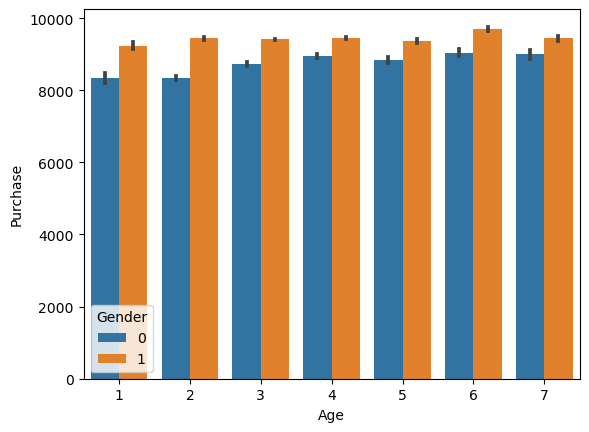

In [33]:
sns.barplot('Age','Purchase',hue='Gender',data=df)

    In above graph :
    Blue - Female
    Saffron - Male
    Age Groups : Corresponding number assigned -
    '0-17':1
    '18-25':2
    '26-35':3
    '36-45':4
    '46-50':5
    '51-55':6
    '55+':7

# Observations:
    1.Males has pruchased more than the females.
    2.People of age group b/w 51-55 has purchased more than any other age group.

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

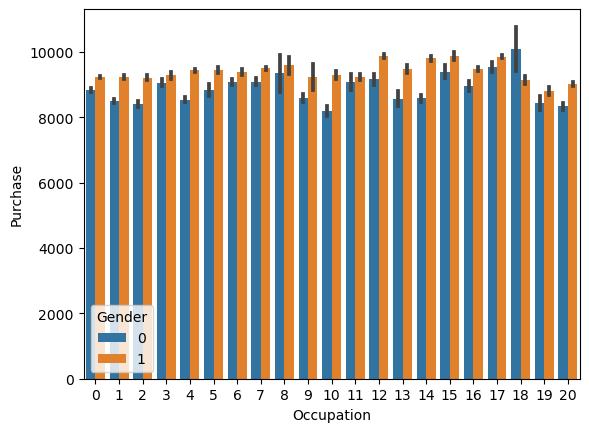

In [34]:
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

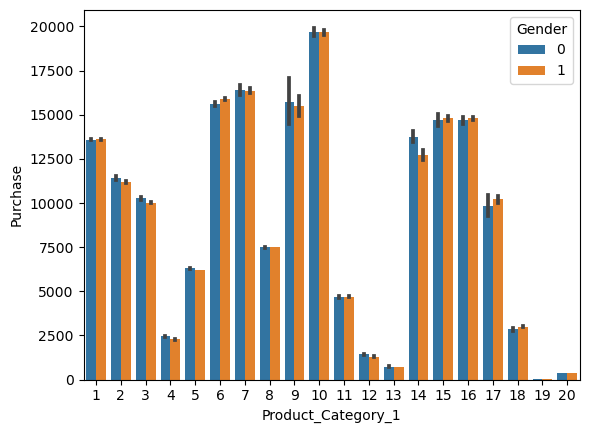

In [35]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

# Observations:
    1. Product 10 of Product_Category_1 is the most purchased product followed by 7,6,9.
    2. Product 20 of Product_Category_1 is the least purchased product followed by 13,12,4.

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

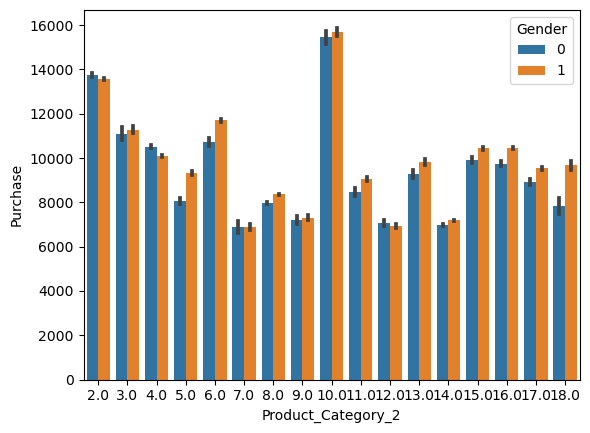

In [36]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

# Observations:
    1. Product 10 of Product_Category_2 is the most purchased product followed by 2 and 6.
    2. Males has pruchased more than the females.

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

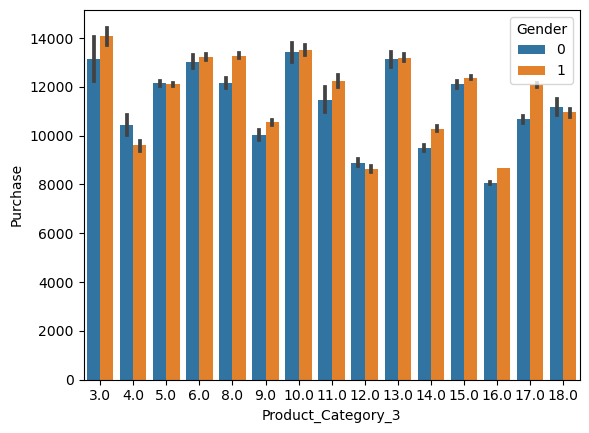

In [37]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

# Feature scaling

In [38]:
df_test = df[df['Purchase'].isnull()]

In [39]:
df_train = df[~df['Purchase'].isnull()]

In [40]:
df_test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
550068,1,5,7,2,1,1,11.0,16.0,NaN,1,0
550069,1,3,17,0,0,3,5.0,16.0,NaN,0,1
550070,0,4,1,4,1,5,14.0,16.0,NaN,1,0
550071,0,4,1,4,1,4,9.0,16.0,NaN,1,0
550072,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [41]:
df_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [42]:
y= df_train['Purchase']
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [43]:
x= df_train.drop(['Purchase'],axis=1)
x

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1
...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,8.0,16.0,1,0
550064,0,3,1,3,0,20,8.0,16.0,0,1
550065,0,3,15,4,1,20,8.0,16.0,1,0
550066,0,7,1,2,0,20,8.0,16.0,0,1


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=32,test_size=0.33)

In [45]:
print(x.shape,
y.shape,
x_train.shape,
x_test.shape,
y_train.shape,
y_test.shape)

(550068, 10) (550068,) (368545, 10) (181523, 10) (368545,) (181523,)


In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Model training

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
regressor = LinearRegression()

In [50]:
regressor.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred = regressor.predict(x_test)
y_pred

array([11510.96918653, 10534.20096286, 10503.0047919 , ...,
       10417.91444036, 10614.81146639, 13035.10029343])

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_test, y_pred)
mae

3580.127085543344

In [53]:
mse = mean_squared_error(y_test, y_pred)
mse

21903742.236262556

In [54]:
r2 = r2_score(y_test,y_pred)
r2

0.1295359415187669

In [55]:
# Create a DataFrame
comparison_df = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})

# Display the DataFrame
comparison_df


,y_true,y_pred
243129,15856.0,11510.969187
316759,13318.0,10534.200963
156610,11792.0,10503.004792
465115,761.0,5346.492108
433136,4512.0,7175.638840
...,...,...
45508,11835.0,10926.211662
237237,1925.0,9204.508313
341915,12033.0,10417.914440
200592,11747.0,10614.811466
